<a href="https://colab.research.google.com/github/thaitruong018/e_commerce_analysis/blob/main/1_Data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Brazilian E-Commerce Analysis**  
This is a Brazilian ecommerce public dataset of orders made at Olist Store. [The dataset](https://www.kaggle.com/olistbr/brazilian-ecommerce) has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.  
Based on this dataset, I will do some exploration and analysis in 5 notebooks to get deeper understanding of e-commerce field.  
- Retention rate  
- Customer segmentation RFM  
- Customer lifetime value  
- Predict next month transaction   
- Sales forcasting  
For further analysis, hopefully, I will explore NLP and A/B testing.


First and foremost, we need to get data

## Set-up

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Upload 'kaggle.json' file
from google.colab import files
files.upload()   # upload your json file that you download from kaggle, you can take a quick look at here -->(https://www.kaggle.com/general/51898)

In [ ]:
# Install kaggle package
!pip install --upgrade --force-reinstall --no-deps kaggle

# Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # set permission

     |████████████████████████████████| 58 kB 5.9 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=67d26bac67afff0d27bbb6b6e7f178349d331b8297b473279cffd615a10c37af
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
#download data
!kaggle datasets download -d olistbr/brazilian-ecommerce

 96% 41.0M/42.6M [00:00<00:00, 103MB/s]
100% 42.6M/42.6M [00:00<00:00, 105MB/s]


In [ ]:
#Unzip
!unzip -q /content/brazilian-ecommerce.zip -d /content/gdrive/MyDrive/brazilian_ecommerce 

In [ ]:
# import libraries
import pandas as pd
import os

In [ ]:
# path to folder
path = '/content/gdrive/MyDrive/brazilian_ecommerce'

In [ ]:
# how many files in this dataset?
os.listdir(path)

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_products_dataset.csv',
 'product_category_name_translation.csv',
 'olist_sellers_dataset.csv']

In [ ]:
# Read dataset
df_orders = pd.read_csv(os.path.join(path,'olist_orders_dataset.csv'))
df_order_items = pd.read_csv(os.path.join(path,'olist_order_items_dataset.csv'))
df_products = pd.read_csv(os.path.join(path,'olist_products_dataset.csv'))
df_customer = pd.read_csv(os.path.join(path,'olist_customers_dataset.csv'))
df_geolocation = pd.read_csv(os.path.join(path, 'olist_geolocation_dataset.csv'))
df_order_payments = pd.read_csv(os.path.join(path, 'olist_order_payments_dataset.csv'))
df_order_reviews =  pd.read_csv(os.path.join(path, 'olist_order_reviews_dataset.csv'))
df_sellers = pd.read_csv(os.path.join(path, 'olist_sellers_dataset.csv'))
df_category = pd.read_csv(os.path.join(path, 'product_category_name_translation.csv'))

In [ ]:
# set variable names
datasets = [df_orders, df_order_items, df_products, df_customer, df_geolocation, 
            df_order_payments, df_order_reviews, df_sellers, df_category]
names = ['olist_orders','olist_order_items', 'olist_products', 'olist_customer', 
         'olist_geolocation', 'olist_order_payments',  'olist_order_reviews', 'olist_sellers', 'olist_category_name']

In [ ]:
# Creating a DataFrame with useful information about all datasets
df_info = pd.DataFrame({})
df_info['dataset'] = names
df_info['n_rows'] = [df.shape[0] for df in datasets]
df_info['n_cols'] = [df.shape[1] for df in datasets]
df_info['null_amount'] = [df.isnull().sum().sum() for df in datasets]
df_info['null_columns_qty'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
df_info['null_columns_names'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

df_info.style.background_gradient()

,dataset,n_rows,n_cols,null_amount,null_columns_qty,null_columns_names
0,olist_orders,99441,8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
1,olist_order_items,112650,7,0,0,
2,olist_products,32951,9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
3,olist_customer,99441,5,0,0,
4,olist_geolocation,1000163,5,0,0,
5,olist_order_payments,103886,5,0,0,
6,olist_order_reviews,99224,7,145903,2,"review_comment_title, review_comment_message"
7,olist_sellers,3095,4,0,0,
8,olist_category_name,71,2,0,0,


We already have overall informaiton about the dataset. To sum up, there are 9 csv files in this Olist dataset. However, in the scope of my analysis 4 files would be sufficient. And these are: olist orders dataset, olist order items, olist products, and olist customers dataset

## Orders dataset

In [ ]:
# first 5 rows
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# overall info
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
# statistical info
df_orders.describe().T

,count,unique,top,freq
order_id,99441,99441,9eac94dce77597b831e8c0dfc584bc8b,1
customer_id,99441,99441,44cee6676b4cf6680ff8b82493a57cf4,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-08-02 12:06:09,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2018-07-24 21:36:42,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


In [ ]:
# check missing values
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
# calculate the ratio of missing values and whole data
(df_orders['order_approved_at'].isna().sum() + \
df_orders['order_delivered_carrier_date'].isna().sum() + \
df_orders['order_delivered_customer_date'].isna().sum()) / df_orders.shape[0]

0.04935589947808248

Missing values account for approximately 5% of the entire data. It's quite small.  
Besides, Date need to be formated as datetime, and truncated to date only (without time) for further analysis

In [ ]:
# I convert date-format columns into datetime format and fill the missing values with 'fill'
# One thing must be noticed is list must be sorted in order
# type a function
def convert_to_dt(df, cols):
  for col in cols:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d').dt.date

# call function
convert_to_dt(df_orders, ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
                       'order_delivered_customer_date','order_estimated_delivery_date' ])
df_orders.sort_values(by='order_purchase_timestamp', inplace=True)

# first three rows of 'order_delivered_customer_date' are empty -->Need to be filled with backward fill
df_orders['order_delivered_customer_date'].iloc[:4].bfill(inplace= True)

# substitute all missing date by forward fill
cols = ['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']
for col in cols:
  df_orders[col].fillna(method= 'ffill', inplace= True)
  
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-11-09,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,2016-10-07,2016-10-18,2016-11-09,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13,2016-10-07,2016-10-18,2016-11-09,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15,2016-09-15,2016-11-07,2016-11-09,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06,2016-11-07,2016-11-09,2016-10-25


In [ ]:
# check missing values again
df_orders.isna().sum()  

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [ ]:
# check duplicate
df_orders.duplicated().sum()

0

In [ ]:
# how many order status?
df_orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

## Order items

In [ ]:
# first 5 rows
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
# overall info
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
# statistical info
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
# check duplicated rows
df_order_items.duplicated().sum()

0

In [ ]:
# check mislabeled data
df_order_items['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
20        3
16        3
17        3
18        3
19        3
21        1
Name: order_item_id, dtype: int64

In [ ]:
# check for duplication in order_id and product_id cols
df_order_items[['order_id', 'product_id']].duplicated().sum()

10225

In [ ]:
# last 3 rows of duplicated dataframe
df_order_items[df_order_items[['order_id', 'product_id']].duplicated()].tail(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19


In [ ]:
#check randomly an order_id
df_order_items[df_order_items['order_id']=='fffb9224b6fc7c43ebb0904318b10b5f']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19


The reason why order_id, product_id have 10225 dupliacted rows is that the order_item_id (=quantity) was split into multiple rows instead of just recording final quantities in a single row

In [ ]:
# checking whether all order_ids from order_items are contained in orders
df_order_items['order_id'].isin(df_orders['order_id']).value_counts()

True    112650
Name: order_id, dtype: int64

In [ ]:
# checking whether all order_ids from orders are contained in order_items
df_orders['order_id'].isin(df_order_items['order_id']).value_counts()

True     98666
False      775
Name: order_id, dtype: int64

In [ ]:
# calculate diff
x = df_order_items['order_id'].nunique()
y = df_orders['order_id'].nunique()
print(f'Total of unique order_ids in order_item table: {x}\n\
Total of unique order_ids in order table: {y}\n\
Diff: {y-x}')

Total of unique order_ids in order_item table: 98666
Total of unique order_ids in order table: 99441
Diff: 775


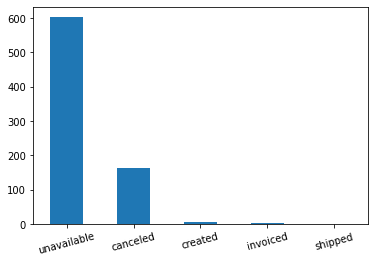

In [ ]:
# plot different records
df_orders[~df_orders['order_id'].isin(df_order_items['order_id'])]['order_status'].value_counts().plot(kind='bar',rot=15);

The quantities of order_id of two dataframe was not equal because there were 775 order_ids unavailabled and canceled

In [ ]:
# redefine orders dataframe
df_orders = df_orders[df_orders['order_id'].isin(df_order_items['order_id'])]

In [ ]:
# restructure order_items dataframe
df_order_items_ = df_order_items.groupby(['product_id','order_id'], as_index=False).agg({
                                                      'order_item_id':'count', # we record total quantity
                                                       'seller_id':'first',  # assume we have only one seller for one product_id
                                                       'shipping_limit_date': 'first', # we choose the first date if rows were duplicated
                                                       'price': 'first',  # we choose the first price if rows were duplicated
                                                       'freight_value': 'first'}) # the same as above
df_order_items_.head()


,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,00066f42aeeb9f3007548bb9d3f33c38,f30149f4a8882a08895b6a242aa0d612,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59
1,00088930e925c41fd95ebfe695fd2655,f5eda0ded77c1293b04c953138c8331d,1,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93
2,0009406fd7479715e4bef61dd91f2462,0bf736fd0fd5169d60de3699fcbcf986,1,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10
3,000b8f95fcb9e0096488278317764d19,3aba44d8e554ab4bb8c09f6f78032ca8,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60
4,000b8f95fcb9e0096488278317764d19,6f0dfb5b5398b271cc6bbd9ee263530e,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60


In [ ]:
# check whether we restructure right or not
x = df_order_items_['order_id'].nunique()
y = df_order_items_['product_id'].nunique()
z =  df_order_items_['order_item_id'].sum()

a = df_order_items['order_id'].nunique()
b = df_order_items['product_id'].nunique()
c = len(df_order_items) # since number of rows equivalent quantity of products in 'df_order_items' table

print(f'Orders in new table: {x} \n\
Orders in old table: {a} \n\
Products in new table: {y} \n\
Products in old table: {b} \n\
Total quantity in new table: {z} \n\
Total quantity in old table: {c}')

Orders in new table: 98666 
Orders in old table: 98666 
Products in new table: 32951 
Products in old table: 32951 
Total quantity in new table: 112650 
Total quantity in old table: 112650


In [ ]:
# rename ordier_item_id to quantity
df_order_items_.rename(columns={'order_item_id':'quantity'}, inplace = True)

In [ ]:
# first 5 rows after restructuring
df_order_items_.head()

,product_id,order_id,quantity,seller_id,shipping_limit_date,price,freight_value
0,00066f42aeeb9f3007548bb9d3f33c38,f30149f4a8882a08895b6a242aa0d612,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59
1,00088930e925c41fd95ebfe695fd2655,f5eda0ded77c1293b04c953138c8331d,1,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93
2,0009406fd7479715e4bef61dd91f2462,0bf736fd0fd5169d60de3699fcbcf986,1,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10
3,000b8f95fcb9e0096488278317764d19,3aba44d8e554ab4bb8c09f6f78032ca8,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60
4,000b8f95fcb9e0096488278317764d19,6f0dfb5b5398b271cc6bbd9ee263530e,1,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60


In [ ]:
# merge orders dataframe and order_items df into one
df_order_items_consolidated = pd.merge(df_orders, df_order_items_,
                                       how='inner', on='order_id')
df_order_items_consolidated.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,quantity,seller_id,shipping_limit_date,price,freight_value
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-11-09,2016-10-20,c1488892604e4ba5cff5b4eb4d595400,1,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,39.99,31.67
1,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-11-09,2016-10-20,f293394c72c9b5fafd7023301fc21fc2,1,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,32.90,31.67
2,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,2016-10-07,2016-10-18,2016-11-09,2016-10-28,f3c2d01a84c947b078e32bbef0718962,1,a425f92c199eb576938df686728acd20,2016-09-19 00:15:34,59.50,15.56
3,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15,2016-09-15,2016-11-07,2016-11-09,2016-10-04,5a6b04657a4c5ee34285d1e4619a96b4,3,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
4,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02,2016-10-06,2016-11-07,2016-11-09,2016-10-25,d2998d7ced12f83f9b832f33cf6507b6,1,25e6ffe976bd75618accfe16cefcbd0d,2016-10-21 16:19:54,100.00,9.34


In [ ]:
# overall info
df_order_items_consolidated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102425 entries, 0 to 102424
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       102425 non-null  object 
 1   customer_id                    102425 non-null  object 
 2   order_status                   102425 non-null  object 
 3   order_purchase_timestamp       102425 non-null  object 
 4   order_approved_at              102425 non-null  object 
 5   order_delivered_carrier_date   102425 non-null  object 
 6   order_delivered_customer_date  102425 non-null  object 
 7   order_estimated_delivery_date  102425 non-null  object 
 8   product_id                     102425 non-null  object 
 9   quantity                       102425 non-null  int64  
 10  seller_id                      102425 non-null  object 
 11  shipping_limit_date            102425 non-null  object 
 12  price                         

In [ ]:
# statistical info
df_order_items_consolidated.describe()

,quantity,price,freight_value
count,102425.000000,102425.000000,102425.000000
mean,1.099829,124.422006,20.111152
std,0.456926,188.926084,15.884700
min,1.000000,0.850000,0.000000
25%,1.000000,40.000000,13.140000
50%,1.000000,78.800000,16.320000
75%,1.000000,139.000000,21.220000
max,20.000000,6735.000000,409.680000


## Products

In [ ]:
# last 5 rows
df_products.tail()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


In [ ]:
# overall info
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
# statistical info
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
# check duplicated rows
df_products.duplicated().sum()

0

In [ ]:
# check for duplication in product_id
df_products['product_id'].duplicated().sum()

0

In [ ]:
# check missing values
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
# fill null values with unknow
df_products['product_category_name'] = df_products['product_category_name'].fillna('Unknown')

In [ ]:
# drop NA 
df_products.dropna()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
# keep only two cols as we dont analyze the other cols
df_products = df_products[['product_id', 'product_category_name']].copy()

In [ ]:
# merge df_order_items_consolidated,and df_products into one
df_order_items_products = pd.merge(df_order_items_consolidated, df_products,
                                       how='inner', on='product_id')
df_order_items_products.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,quantity,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-11-09,2016-10-20,c1488892604e4ba5cff5b4eb4d595400,1,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,39.99,31.67,moveis_decoracao
1,35d3a51724a47ef1d0b89911e39cc4ff,27ab53f26192510ff85872aeb3759dcc,delivered,2016-10-04,2016-10-05,2016-10-14,2016-10-26,2016-12-20,c1488892604e4ba5cff5b4eb4d595400,1,1554a68530182680ad5c8b042c3ab563,2016-10-14 02:44:30,39.99,22.34,moveis_decoracao
2,c4f710df20f7d1500da1aef81a993f65,4b671f05b6eb9dc1d2c1bae9c8c78536,delivered,2016-10-10,2016-10-10,2016-10-18,2016-10-26,2016-12-14,c1488892604e4ba5cff5b4eb4d595400,1,1554a68530182680ad5c8b042c3ab563,2016-10-26 16:35:46,39.99,11.80,moveis_decoracao
3,81e5043198a44ddeb226002ff55d8ad4,ddd15ef77c83eea8c534d2896173a927,delivered,2017-01-09,2017-01-09,2017-01-09,2017-02-24,2017-02-24,c1488892604e4ba5cff5b4eb4d595400,2,1554a68530182680ad5c8b042c3ab563,2017-01-13 00:37:18,38.50,15.56,moveis_decoracao
4,03b218d39c422c250f389120c531b61f,db857a86c685a6a3a02a705961ec1ff1,delivered,2017-01-14,2017-01-14,2017-01-16,2017-01-18,2017-03-01,c1488892604e4ba5cff5b4eb4d595400,1,1554a68530182680ad5c8b042c3ab563,2017-01-18 14:20:01,38.50,11.74,moveis_decoracao


In [ ]:
# info
df_order_items_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102425 entries, 0 to 102424
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       102425 non-null  object 
 1   customer_id                    102425 non-null  object 
 2   order_status                   102425 non-null  object 
 3   order_purchase_timestamp       102425 non-null  object 
 4   order_approved_at              102425 non-null  object 
 5   order_delivered_carrier_date   102425 non-null  object 
 6   order_delivered_customer_date  102425 non-null  object 
 7   order_estimated_delivery_date  102425 non-null  object 
 8   product_id                     102425 non-null  object 
 9   quantity                       102425 non-null  int64  
 10  seller_id                      102425 non-null  object 
 11  shipping_limit_date            102425 non-null  object 
 12  price                         

In [ ]:
# statistical info
df_order_items_products.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,102425.0,1.099829,0.456926,1.00,1.00,1.00,1.00,20.00
price,102425.0,124.422006,188.926084,0.85,40.00,78.80,139.00,6735.00
freight_value,102425.0,20.111152,15.884700,0.00,13.14,16.32,21.22,409.68


## Customers

In [ ]:
# customere data
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# overall info
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
# check duplicated rows
df_customer.duplicated().sum()

0

In [ ]:
# check duplication in customerid
df_customer['customer_id'].duplicated().sum()

0

In [ ]:
# check duplication in customer_unique_id
df_customer['customer_unique_id'].duplicated().sum()

3345

Since the customer_id contains all unique values, we cannot base on that to do further analysis like retention rate, RFM,...  
Hence, we need to use customer_unique_id

# Final dataset

In [ ]:
# merge df_order_items_products, and df_customer into one
df_order_items_products_customers = pd.merge(df_order_items_products,df_customer, how='inner', on='customer_id')
df_order_items_products_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,quantity,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-11-09,2016-10-20,c1488892604e4ba5cff5b4eb4d595400,1,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,39.99,31.67,moveis_decoracao,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR
1,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04,2016-10-07,2016-10-18,2016-11-09,2016-10-20,f293394c72c9b5fafd7023301fc21fc2,1,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,32.90,31.67,moveis_decoracao,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR
2,35d3a51724a47ef1d0b89911e39cc4ff,27ab53f26192510ff85872aeb3759dcc,delivered,2016-10-04,2016-10-05,2016-10-14,2016-10-26,2016-12-20,c1488892604e4ba5cff5b4eb4d595400,1,1554a68530182680ad5c8b042c3ab563,2016-10-14 02:44:30,39.99,22.34,moveis_decoracao,f922896769e9517ea3c630f3c8de86d0,96832,santa cruz do sul,RS
3,c4f710df20f7d1500da1aef81a993f65,4b671f05b6eb9dc1d2c1bae9c8c78536,delivered,2016-10-10,2016-10-10,2016-10-18,2016-10-26,2016-12-14,c1488892604e4ba5cff5b4eb4d595400,1,1554a68530182680ad5c8b042c3ab563,2016-10-26 16:35:46,39.99,11.80,moveis_decoracao,0ecf7f65b5ff3b9e61b637e59f495e0a,30411,belo horizonte,MG
4,81e5043198a44ddeb226002ff55d8ad4,ddd15ef77c83eea8c534d2896173a927,delivered,2017-01-09,2017-01-09,2017-01-09,2017-02-24,2017-02-24,c1488892604e4ba5cff5b4eb4d595400,2,1554a68530182680ad5c8b042c3ab563,2017-01-13 00:37:18,38.50,15.56,moveis_decoracao,853ba75a0b423722ccf270eea3b4cfe4,21843,rio de janeiro,RJ


In [ ]:
# overall info
df_order_items_products_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102425 entries, 0 to 102424
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       102425 non-null  object 
 1   customer_id                    102425 non-null  object 
 2   order_status                   102425 non-null  object 
 3   order_purchase_timestamp       102425 non-null  object 
 4   order_approved_at              102425 non-null  object 
 5   order_delivered_carrier_date   102425 non-null  object 
 6   order_delivered_customer_date  102425 non-null  object 
 7   order_estimated_delivery_date  102425 non-null  object 
 8   product_id                     102425 non-null  object 
 9   quantity                       102425 non-null  int64  
 10  seller_id                      102425 non-null  object 
 11  shipping_limit_date            102425 non-null  object 
 12  price                         

Explain main columns name  
- order_id:            A unique id of order made by the customer
- customer_id:         Id of the customer who made the purchase
- customer_unique_id:  Unique id of the customer
- order_status:        Status of the order made
- order_purchase_timestamp:  Timestamp of the purchase
- product_id:          A unique id given to each product available on the site  
- quantity:            The number of products which was purchased 
- price:               Actual price of the products ordered  
- freight_value:       Price rate at which a product is delivered from one point to another  
- product_category_name:  Name of the product category


In [ ]:
# save final file
df_order_items_products_customers.to_csv(os.path.join(path,'df_order_items_products_customers.csv'), encoding='utf-8-sig', index=False)